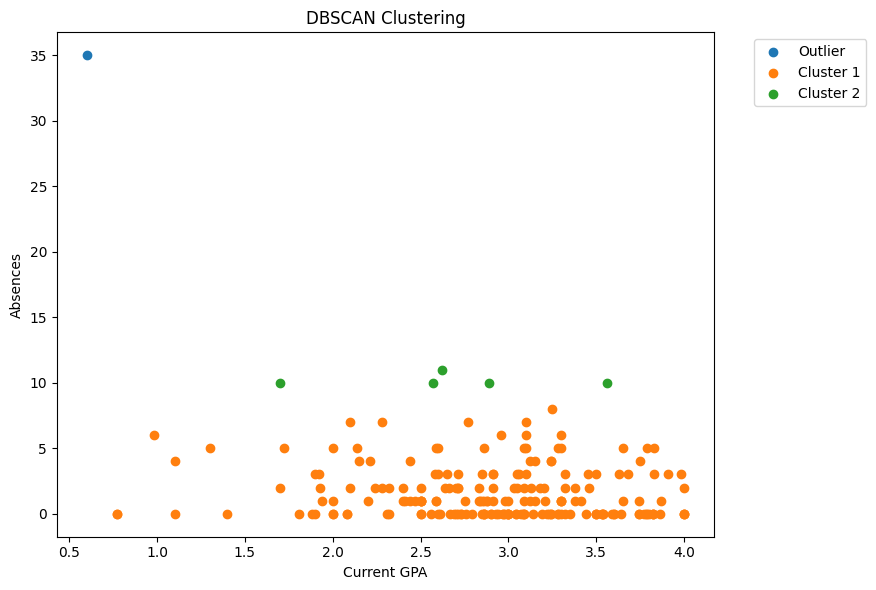

Silhouette Score:  0.688358100623696


In [16]:
import pandas as pd
from numpy import unique, where
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
file_path = 'Cleansed.xlsx'  # replace with your file path
df = pd.read_excel(file_path)
X = df[['Current GPA', 'Absences']].values

# Define the model
model = DBSCAN(eps=1.5, min_samples=3)  # Adjust the parameters as needed
# Fit model and predict clusters
yhat = model.fit_predict(X)
# Retrieve unique clusters
clusters = unique(yhat)

plt.figure(figsize=(12, 6))

# Create scatter plot for samples from each cluster
for cluster in clusters:
    # Get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # Create scatter of these samples
    label = 'Outlier' if cluster == -1 else f'Cluster {cluster + 1}'
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=label)

# Show the plot
plt.xlabel('Current GPA')
plt.ylabel('Absences')
plt.title('DBSCAN Clustering')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

# Calculate silhouette score
if len(unique(yhat)) > 1:  # Silhouette score is only meaningful for more than one cluster
    sil_score = silhouette_score(X, yhat)
    print("Silhouette Score: ", sil_score)
else:
    print("Silhouette Score cannot be calculated with only one cluster.")
